In [1]:
import pandas as pd
import sys
sys.path.append("..")

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
valid_emb = pd.read_pickle("../pickle_backups/valid_embeddings2024-06-09T13.45.1717908334.pickle")

In [3]:
valid_emb

,answers,passages,query,query_id,query_type,wellFormedAnswers,texts,sif_queries,sif_texts,glove_queries,glove_texts
0,"[Approximately $15,000 per year.]","{'is_selected': [1, 0, 0, 0, 0, 0], 'passage_t...",[walgreens store sales average],9652,numeric,[],[The average Walgreens salary ranges from appr...,"[0.7763479949378893, -1.3830823001409482, -0.2...","[[0.02034845339194215, 0.11529917046487945, 0....","[[-0.018800005316734314, -0.42156500183045864,...","[[0.16146404979129633, 0.38163150246772504, 0...."
1,"[$21,550 per year, The average hourly wage for...","{'is_selected': [0, 1, 0, 0, 0, 0, 0, 0], 'pas...",[how much do bartenders make],9653,numeric,[],[A bartender’s income is comprised mostly of t...,"[-0.08902376847839652, -0.8301114198020483, -0...","[[-0.16324950169195132, -0.2065418509276941, -...","[[0.36390739530324934, -0.2086885966360569, -0...","[[0.3553565466961479, 0.15299491232184514, -0...."
2,"[A boil, also called a furuncle, is a deep fol...","{'is_selected': [0, 0, 0, 0, 0, 0, 1, 0], 'pas...",[what is a furuncle boil],9654,description,[],"[Knowledge center. A boil, also known as a fur...","[-0.10244567160941863, -0.5065870268166472, -0...","[[-0.006556548858879555, -0.001943971405189044...","[[0.29442249797284603, 0.16276024375110865, -0...","[[0.4890792703104986, 0.1256954322594243, -0.1..."
3,"[Detect and assess a wide range of disorders, ...","{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0], '...",[what can urinalysis detect],9655,description,[],[Urinalysis: One way to test for bladder cance...,"[-0.023860336797058297, -0.9807020680210816, -...","[[0.23862219159885772, -0.014936013527340523, ...","[[0.6557724811136723, -0.29790975805372, 0.266...","[[0.5386436346805457, 0.15065066634931348, -0...."
4,"[Shigellosis, diseases of the nervous system, ...","{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0], '...",[what is vitamin a used for],9656,description,[],[Since vitamin A is fat-soluble it is not need...,"[1.0292867916998354, 0.5447845683147463, 0.194...","[[0.12906091759182414, -0.06915284666503352, -...","[[0.5181066766381264, 0.33818849238256615, -0....","[[0.6052714314843927, 0.1218423502302015, -0.1..."
...,...,...,...,...,...,...,...,...,...,...,...
111135,"[It is defined as the quality of being wide, o...","{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",[define width],129177,NUMERIC,[],[1 The state of being wide. 2 The measurement...,"[-0.37137602269406855, 0.9710230103521015, 0.5...","[[-0.22109694636836927, -0.06663256192445635, ...","[[-0.2962600141763687, 0.8332550227642059, 0.4...","[[0.22594285775356146, 0.3167748327595087, 0.0..."
111136,[Human Resource Management is the term used to...,"{'is_selected': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",[forbes definition of human resource management],190655,DESCRIPTION,[],[Human Resource Management (HRM) is the term u...,"[-0.23593146602095036, 0.23892741582755989, 1....","[[0.08410007159051164, -0.17980611626840967, -...","[[0.14113166431585947, 0.22343866464992365, 0....","[[0.3849795026083787, 0.1639609307050705, -0.1..."
111137,[No Answer Present.],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",[how long to wax urethane paint],272679,NUMERIC,[],[Cleans up with mineral spirits. Can be recoat...,"[0.14458594481752662, -1.1946235183254443, -0....","[[0.022842143287017714, 0.0044048202172385946,...","[[0.27921833594640094, -0.034093823904792465, ...","[[0.16900434335203549, 0.24298431670391246, -0..."
111138,[No Answer Present.],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",[easiest way to check accounts payable entered...,177416,DESCRIPTION,[],[1 Set up an Item called Bad Debt Write-Off. T...,"[-0.40412365084704244, -1.6497728288373552, 0....","[[0.033126217608729865, 0.026300816820519306, ...","[[0.35788977415197426, -0.09052957863443428, 0...","[[0.2883113875815814, 0.23808829494836656, 0.0..."


In [4]:


pbar = tqdm(total=len(valid_emb))



def calculate_cosine_similarity(query_embedding, passage_embeddings):
    similarities = []
    for passage_embedding in passage_embeddings:
        passage_embedding = np.array(passage_embedding)
        query_embedding = np.array(query_embedding)  
        
        similarity = cosine_similarity(query_embedding.reshape(1, -1), passage_embedding.reshape(1, -1))
        similarities.append(similarity)
    return similarities

cosine_sim_glove = []
cosine_sim_sif = []

for i in range(len(valid_emb)):
    glove_query_embedding = valid_emb['glove_queries'][i]
    sif_query_embedding = valid_emb['sif_queries'][i]
    glove_passage_embeddings = valid_emb['glove_texts'][i]
    sif_passage_embeddings = valid_emb['sif_texts'][i]
    
    glove_cosine_similarities = calculate_cosine_similarity(glove_query_embedding, glove_passage_embeddings)
    sif_cosine_similarities = calculate_cosine_similarity(sif_query_embedding, sif_passage_embeddings)
    cosine_sim_glove.append(max(glove_cosine_similarities))
    cosine_sim_sif.append(max(sif_cosine_similarities))
    
pbar.close()


100%|██████████| 111140/111140 [04:45<00:00, 388.75it/s]


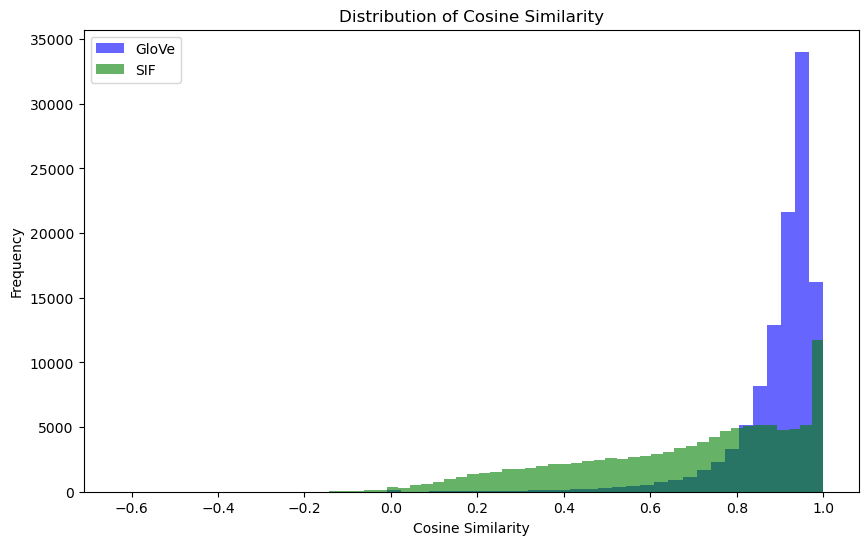

Mean Cosine Similarity - GloVe: 0.895429196158904
Mean Cosine Similarity - SIF: 0.6743702337851428


In [6]:

def visualize_cosine_similarity(glove_similarities, sif_similarities):

    glove_similarities = np.concatenate(glove_similarities)
    sif_similarities = np.concatenate(sif_similarities)

    plt.figure(figsize=(10, 6))
    plt.hist(glove_similarities, bins=50, alpha=0.6, color='blue', label='GloVe')
    plt.hist(sif_similarities, bins=50, alpha=0.6, color='green', label='SIF')
    
    plt.title('Distribution of Cosine Similarity')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

visualize_cosine_similarity(cosine_sim_glove, cosine_sim_sif)

mean_cosine_sim_glove = np.mean(np.concatenate(cosine_sim_glove))
mean_cosine_sim_sif = np.mean(np.concatenate(cosine_sim_sif))
print("Mean Cosine Similarity - GloVe:", mean_cosine_sim_glove)
print("Mean Cosine Similarity - SIF:", mean_cosine_sim_sif)


SIF does not seem to be as effective in capturing semantic similarity when compared with GLOVE.
This is arguably because SIF represents more context differences and also emphasizes less common words.